# Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import stats

# Checking Dataset

In [2]:
#Calling csv file
df = pd.read_csv('diabetes.csv')

#Having a first pick at the dataset
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
#Check for Null values and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Look for duplicates
df.duplicated().sum()

0

In [5]:
#Quick Statistic summary 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There dataframe shows as there are no missing values present in the dataset.

For the sake of creating better visualisations and easing further analysis, I will be creating a secondary dataframe which will put some of the main health-related variables at a certain range (bins):

Glucose
- Below normal: < 70 mg/dL,
Normal: 70 - 99 mg/dL,
Above normal: 100 - 125 mg/dL,
Excessively high: >= 126 mg/dL

BloodPressure
- Below normal: < 90/60 mmHg,
Normal: 90/60 - 119/79 mmHg,
Above normal: 120/80 - 139/89 mmHg,
Excessively high: >= 140/90 mmHg

SkinThickness
- Below normal: < 10 mm,
Normal: 10 - 30 mm,
Above normal: 31 - 40 mm,
Excessively high: >= 41 mm

Insulin
- Below normal: < 16 mcU/mL,
Normal: 16 - 166 mcU/mL,
Above normal: 167 - 249 mcU/mL,
Excessively high: >= 250 mcU/mL

BMI
- Underweight: < 18.5 kg/m^2,
Normal: 18.5 - 24.9 kg/m^2,
Overweight: 25 - 29.9 kg/m^2,
Obese: >= 30 kg/m^2


### Creating a second dataset

In [6]:
# define the bins
glu_bins = [0, 70, 99, 125, 199]
blo_bins = [0, 90, 119, 139, 140]
skn_bins = [0, 10, 30, 40, 99]
Ins_bins = [0, 16, 166, 249, 846]
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 67.1]

# define labels
glu_labels = ['<70', '70-99', '100-125', '>=126']
blo_labels = ['<90', '90-119', '120-139', '>=140']
skn_labels = ['<10', '10-30', '31-40', '>=41']
Ins_labels = ['<16', '16-166', '167-249', '>=250']
bmi_labels = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '>=35']

#create df copy
df2 = df.copy()

# use cut to bin val and replace column
df2['Glucose'] = pd.cut(df2['Glucose'], bins=glu_bins, labels=glu_labels)
df2['BloodPressure'] = pd.cut(df2['BloodPressure'], bins=blo_bins, labels=blo_labels)
df2['SkinThickness'] = pd.cut(df2['SkinThickness'], bins=skn_bins, labels=skn_labels)
df2['Insulin'] = pd.cut(df2['Insulin'], bins=Ins_bins, labels=Ins_labels)
df2['BMI'] = pd.cut(df2['BMI'], bins=bmi_bins, labels=bmi_labels)


In [7]:
df2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,>=126,<90,31-40,NaN,30-34.9,0.627,50,1
1,1,70-99,<90,10-30,NaN,25-29.9,0.351,31,0
2,8,>=126,<90,NaN,NaN,18.5-24.9,0.672,32,1


After creating bins we can now highlight some of the missing values

In [8]:
#Checking the null values
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

It is impossible for a Living Human Being to have 0 levels of glucose, blood pressure, skin thickness, Insuline or BMI.

Therefore I will have to deal with the missing values and replace them. 

This time I will be using the Simple Imputer model for imputation

In [9]:
# Convert non-numerical variables to numerical using LabelEncoder
col_imp = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
label_encoders = {}
for col in col_imp:
    if df2[col].dtype == 'object':
        le = LabelEncoder()
        df2[col] = le.fit_transform(df2[col].astype(str))
        label_encoders[col] = le

# Impute missing values using SimpleImputer with mode strategy
imputer = SimpleImputer(strategy='most_frequent')
df2_imp = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

# Convert back numerical values to categorical using inverse_transform
for col in col_imp:
    if df2_imp[col].dtype == 'int':
        le = label_encoders[col]
        df2_imp[col] = le.inverse_transform(df2_imp[col])

# Convert categorical columns back to object type
df2_imp[col_imp] = df2_imp[col_imp].astype(object)

In [10]:
#Check that result is comform
df2 = df2_imp
df2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,>=126,<90,31-40,16-166,30-34.9,0.627,50,1
1,1,70-99,<90,10-30,16-166,25-29.9,0.351,31,0
2,8,>=126,<90,10-30,16-166,18.5-24.9,0.672,32,1


# Data Visualisation & EDA

c:\Users\kimka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Pregnancies')

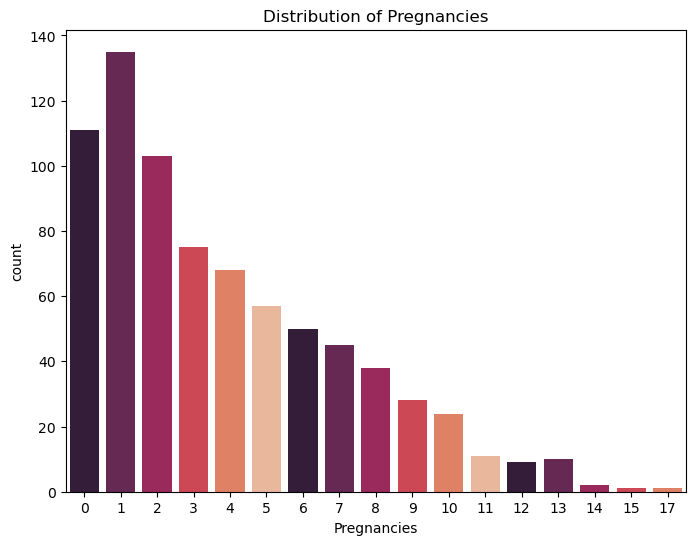

In [11]:
#Bar chart of pregnancy quantity
color = sns.color_palette("rocket")
plt.figure(figsize=(8, 6))
sns.countplot(df2['Pregnancies'], palette=color)
plt.title('Distribution of Pregnancies')
#plt.show()

Text(0.5, 1.0, 'Distribution of Glucose Levels')

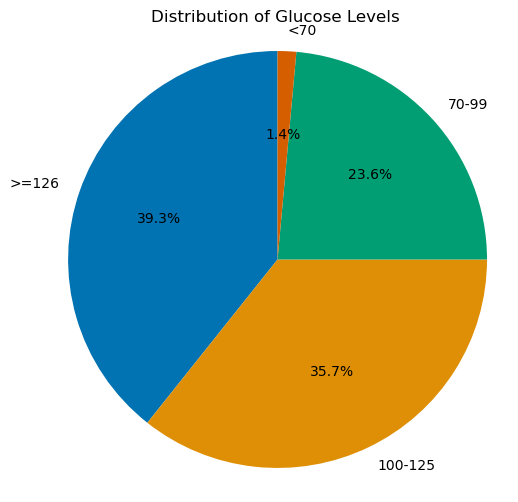

In [12]:
# Pie chart of Glucose
glu_count = df2['Glucose'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('colorblind')
plt.pie(glu_count, labels=glu_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Glucose Levels')
#plt.show()

Text(0.5, 1.0, 'Distribution of Blood Preassure')

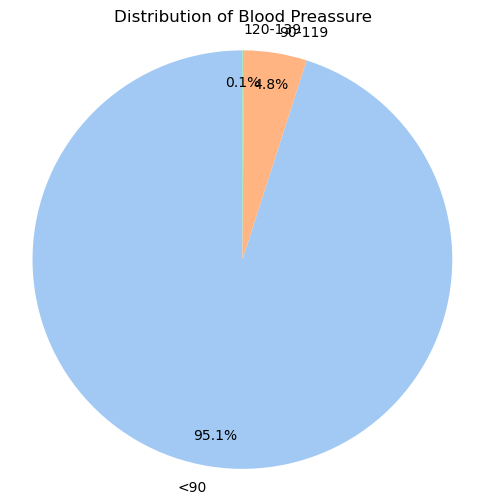

In [13]:
# Pie chart of Blood Pressure
bldp_count = df2['BloodPressure'].value_counts()
label_props = {'fontsize': 12, 'fontweight': 'bold'}
plt.figure(figsize=(6, 6))
sns.set_palette('pastel')
plt.pie(bldp_count, labels=bldp_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal') 
plt.title('Distribution of Blood Preassure')
#plt.show()

Text(0.5, 1.0, 'Distribution of Skin Thickness')

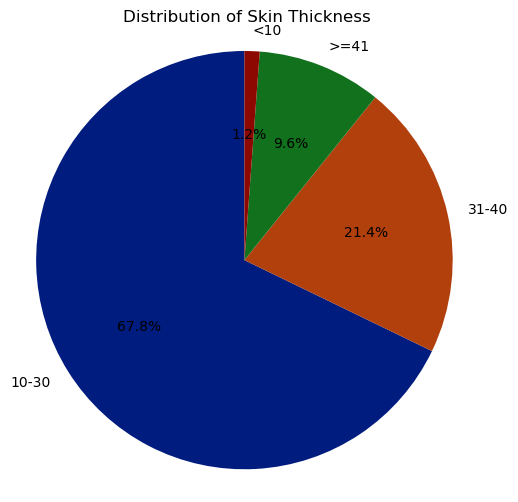

In [14]:
# Pie chart of Skin Thickness
Skn_count = df2['SkinThickness'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('dark')
plt.pie(Skn_count, labels=Skn_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Skin Thickness')
#plt.show()

Text(0.5, 1.0, 'Distribution of Insulin Levels')

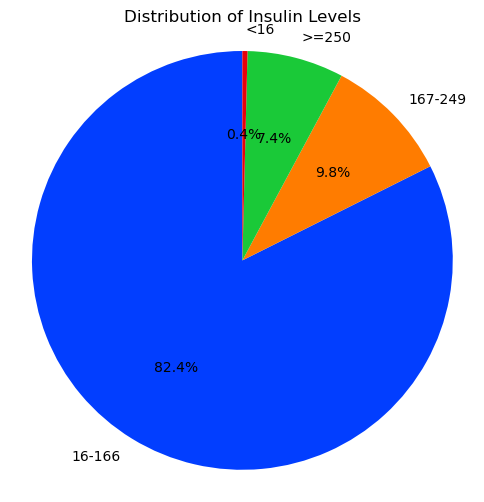

In [15]:
# Pie chart of Insuline
ins_count = df2['Insulin'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('bright')
plt.pie(ins_count, labels=ins_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Insulin Levels')
#plt.show()

Text(0.5, 1.0, 'Distribution of BMI')

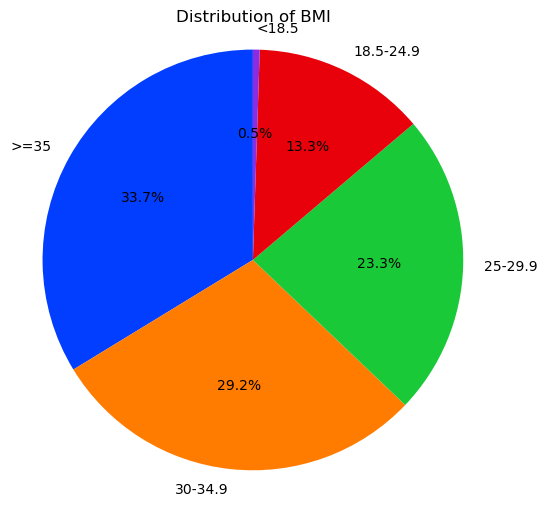

In [16]:
#Create a Pie chart and Bar chart of BMI 
bmi_count = df2['BMI'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('bright')
plt.pie(bmi_count, labels=bmi_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of BMI')
#plt.show()

Text(0.5, 1.0, 'Blood Preassure vs SkinThickness Scatter Plot')

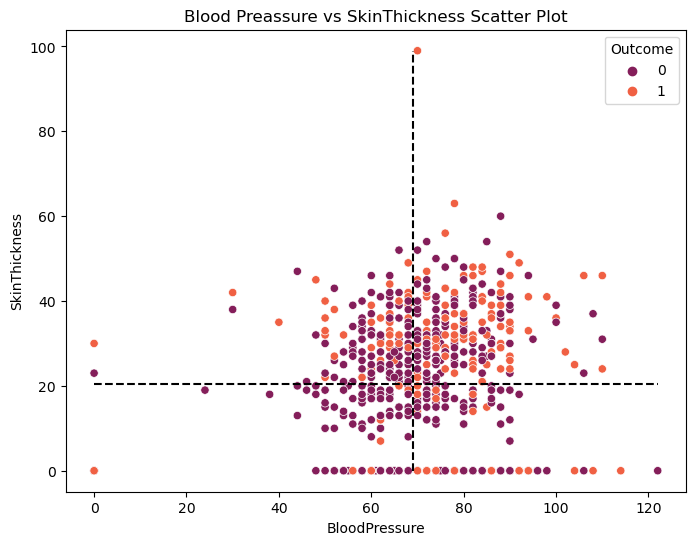

In [17]:
#ScatterPlot on the BloodPressure and SkinThickness
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='BloodPressure', y='SkinThickness', hue='Outcome', palette='rocket')

x_mid = np.mean(df['BloodPressure'])
y_mid = np.mean(df['SkinThickness'])


plt.plot([df['BloodPressure'].min(), df['BloodPressure'].max()], [y_mid, y_mid], color='black', linestyle='--')
plt.plot([x_mid, x_mid], [df['SkinThickness'].min(), df['SkinThickness'].max()], color='black', linestyle='--')

plt.title('Blood Preassure vs SkinThickness Scatter Plot')

c:\Users\kimka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar chart of Outcome for Diabetes')

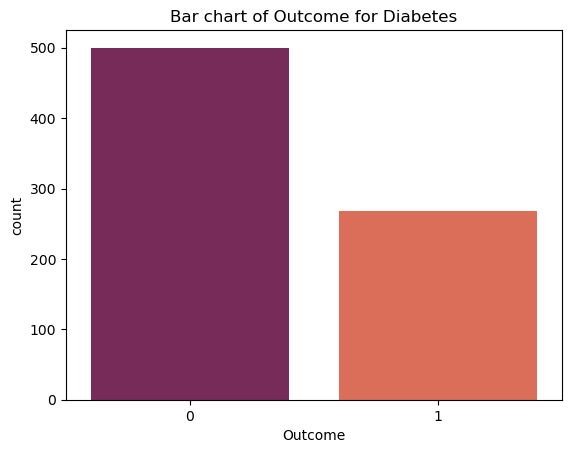

In [18]:
#Plot Graph on Outcome
plt.figure()
sns.countplot(df2['Outcome'], palette='rocket')
plt.title('Bar chart of Outcome for Diabetes')

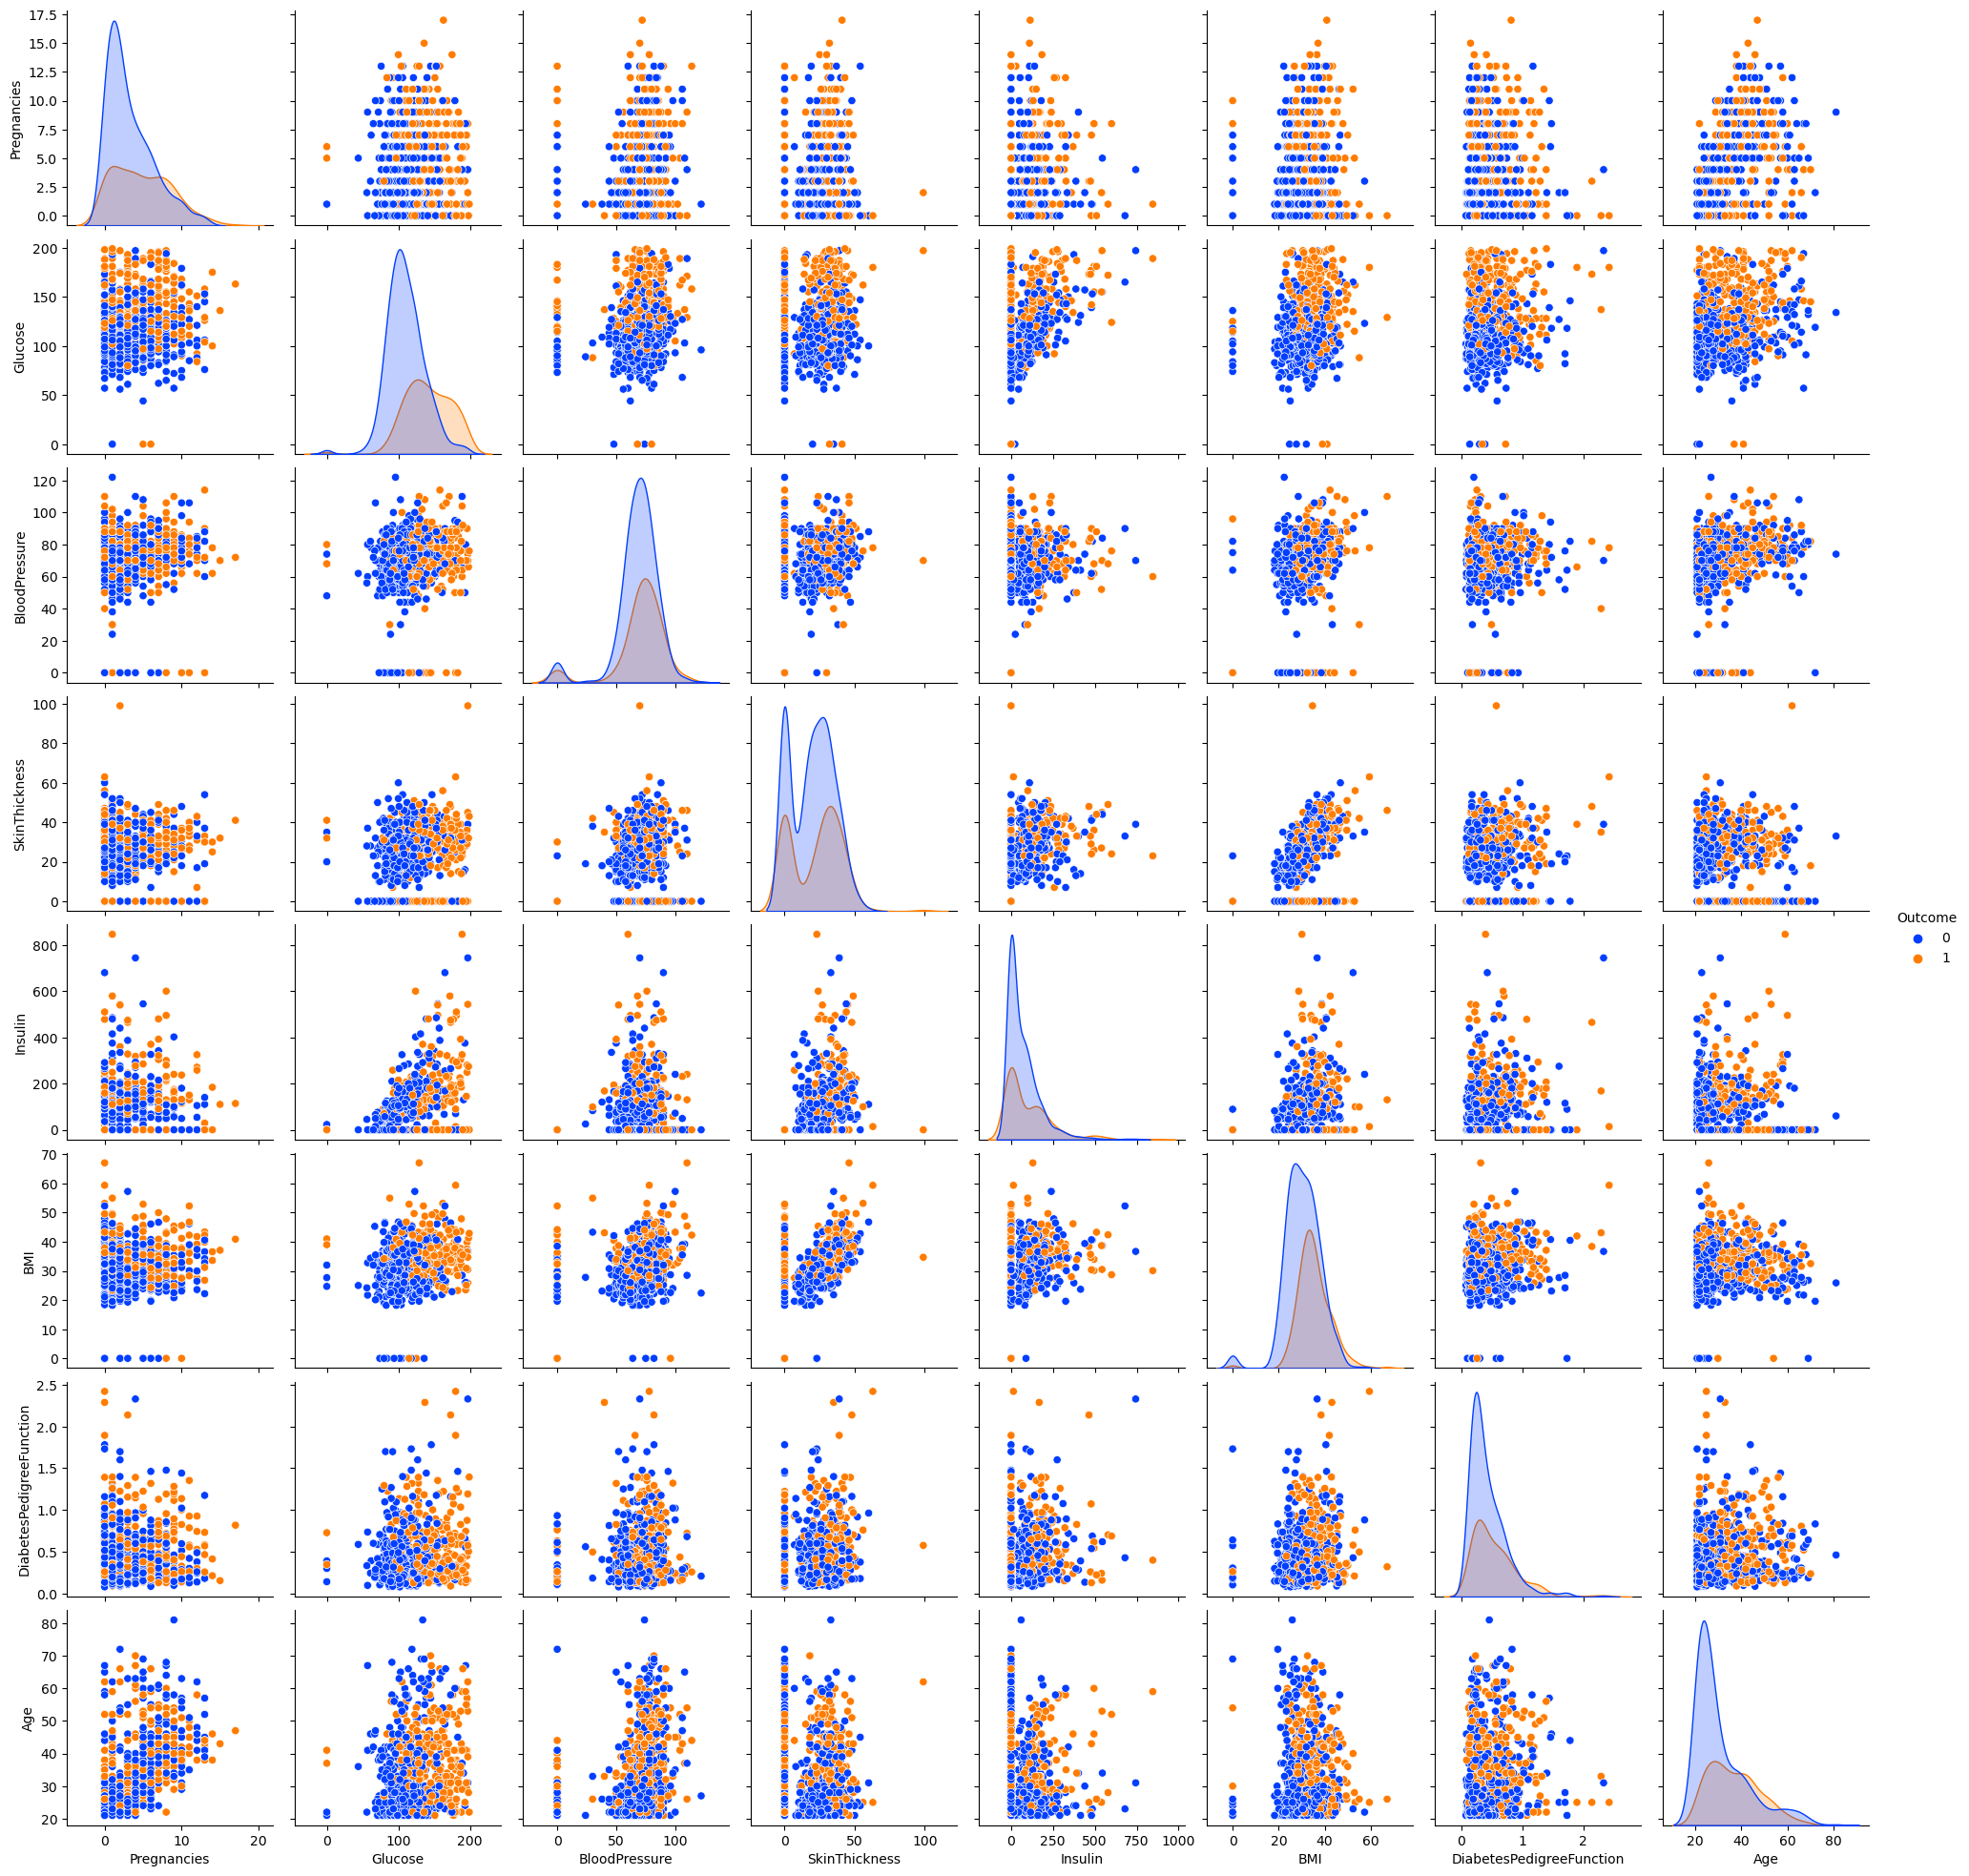

In [19]:
# All variables Correlation
sns.pairplot(df, hue="Outcome")

Text(0.5, 1.0, 'Correlation Matrix for the main dataframe')

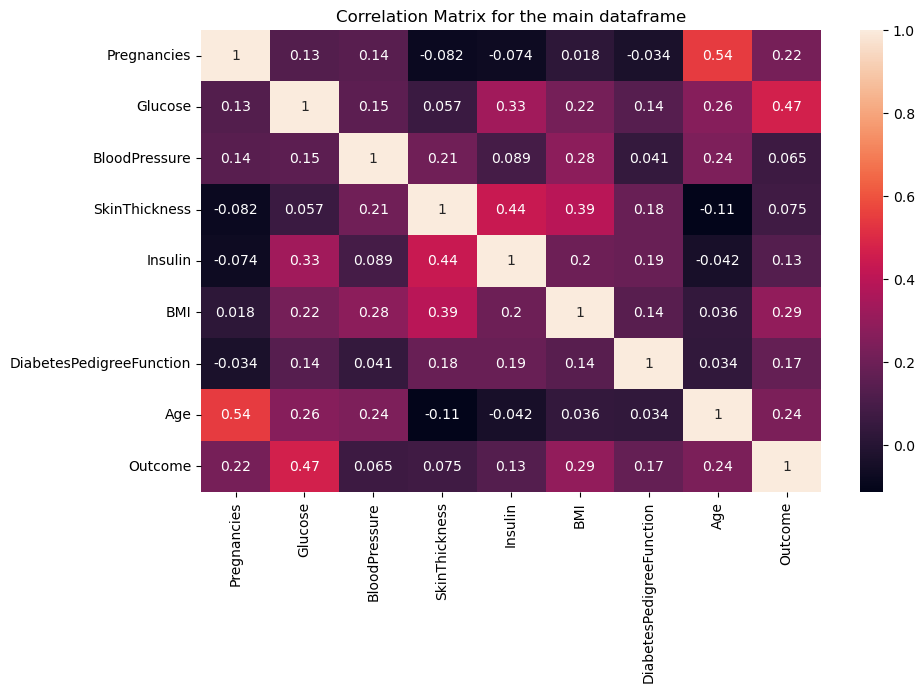

In [20]:
# Correlation Matrix for the main original df
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.title('Correlation Matrix for the main dataframe')

In [21]:
# Convert non-numerical variables to numerical using LabelEncoder
col_imp = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
label_encoders = {}
for col in col_imp:
    if df2[col].dtype == 'object':
        le = LabelEncoder()
        df2[col] = le.fit_transform(df2[col].astype(str))
        label_encoders[col] = le

# Convert categorical columns back to object type
df2[col_imp] = df2[col_imp].astype(float)

In [22]:
df2.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3.0,2.0,1.0,0.0,2.0,0.627,50,1
1,1,1.0,2.0,0.0,0.0,1.0,0.351,31,0
2,8,3.0,2.0,0.0,0.0,0.0,0.672,32,1


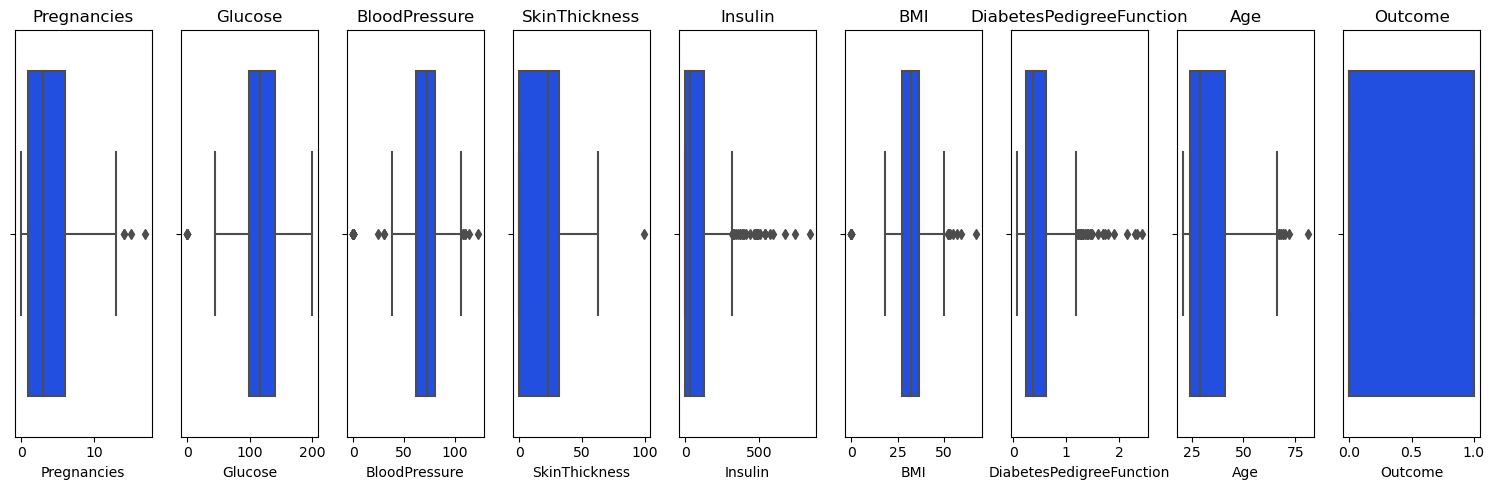

In [23]:
# Checking for Outlier values
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

# Iterate over each column and create a box plot
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

There are 5 variables with a certain level of outliers: Blood Pressure, Insulin, BMI, Diabetes Pedigree, and Age. However, only two of them exhibit a considerably strong level of outliers: Insulin and Diabetes Pedigree.

Before proceeding with any further analysis or procedures, it is imperative to address the outliers present in these two columns.

#### Dealing with Outliers

In [24]:
columns_to_trim = ['Insulin', 'DiabetesPedigreeFunction']

# Trim the specified columns by removing the top and bottom 5% of observations
df_trim = df[~((np.abs(stats.zscore(df[columns_to_trim])) > 1.96).any(axis=1))]

# Print the trimmed dataframe
df_trim.describe()

C:\Users\kimka\AppData\Local\Temp\ipykernel_9708\4282986903.py:4: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  df_trim = df[~((np.abs(stats.zscore(df[columns_to_trim])) > 1.96).any(axis=1))]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,3.844380,118.306916,68.723343,19.674352,60.334294,31.743660,0.415630,33.041787,0.324207
std,3.365471,30.856453,19.933399,15.963450,77.132356,7.817327,0.232663,11.742413,0.468416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.925000,0.237000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.346500,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,110.000000,36.175000,0.570500,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,304.000000,67.100000,1.114000,81.000000,1.000000


# Machine Learning

### Splitting the Data

In [25]:
#Dropping the target from the main datafram to use in X
df_trim_drp = df_trim.drop(columns=['Outcome'])

#Splitting the dataset
X = df_trim_drp
y = df_trim['Outcome']

#Train test split to use in our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

### Standardize data after Splitting

In [26]:
#Standardize the data using Normalization method
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1

### Linear Regression

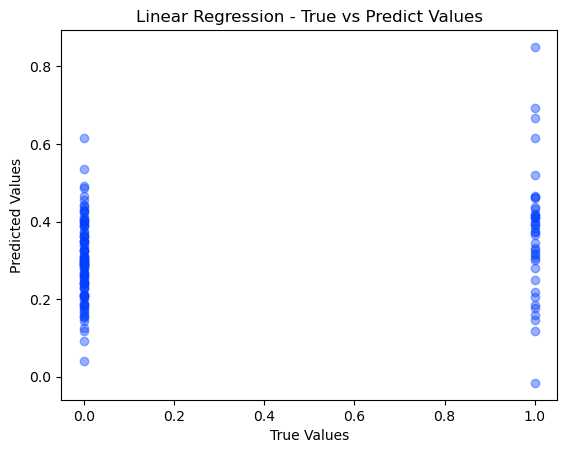

In [27]:
#Linear Regression
#call the model
lr = LinearRegression()

#fit the model
lr.fit(X_train_scaled, y_train)

#Plot the model results
#predict on test set
lr_y_pred = lr.predict(X_test_scaled)

#plot Linear Regression model test results
plt.scatter(y_test, lr_y_pred, alpha=.4)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - True vs Predict Values')
plt.show()

## Model 2

### K-Nearest Neighbor

c:\Users\kimka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


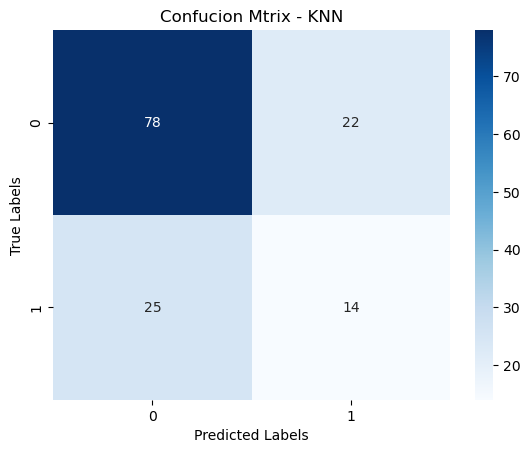

In [28]:
#K-Nearest Neighbor
#call model
knn = KNeighborsClassifier(n_neighbors=3)

#fit the model
knn.fit(X_train_scaled, y_train)

#Plot the model results
#predict on test set
knn_y_pred = knn.predict(X_test_scaled)

#confucion matrix
knn_matrix = confusion_matrix(y_test, knn_y_pred)

#plot results
sns.heatmap(knn_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confucion Mtrix - KNN')
plt.show()

## Model 3

### Decision Tree

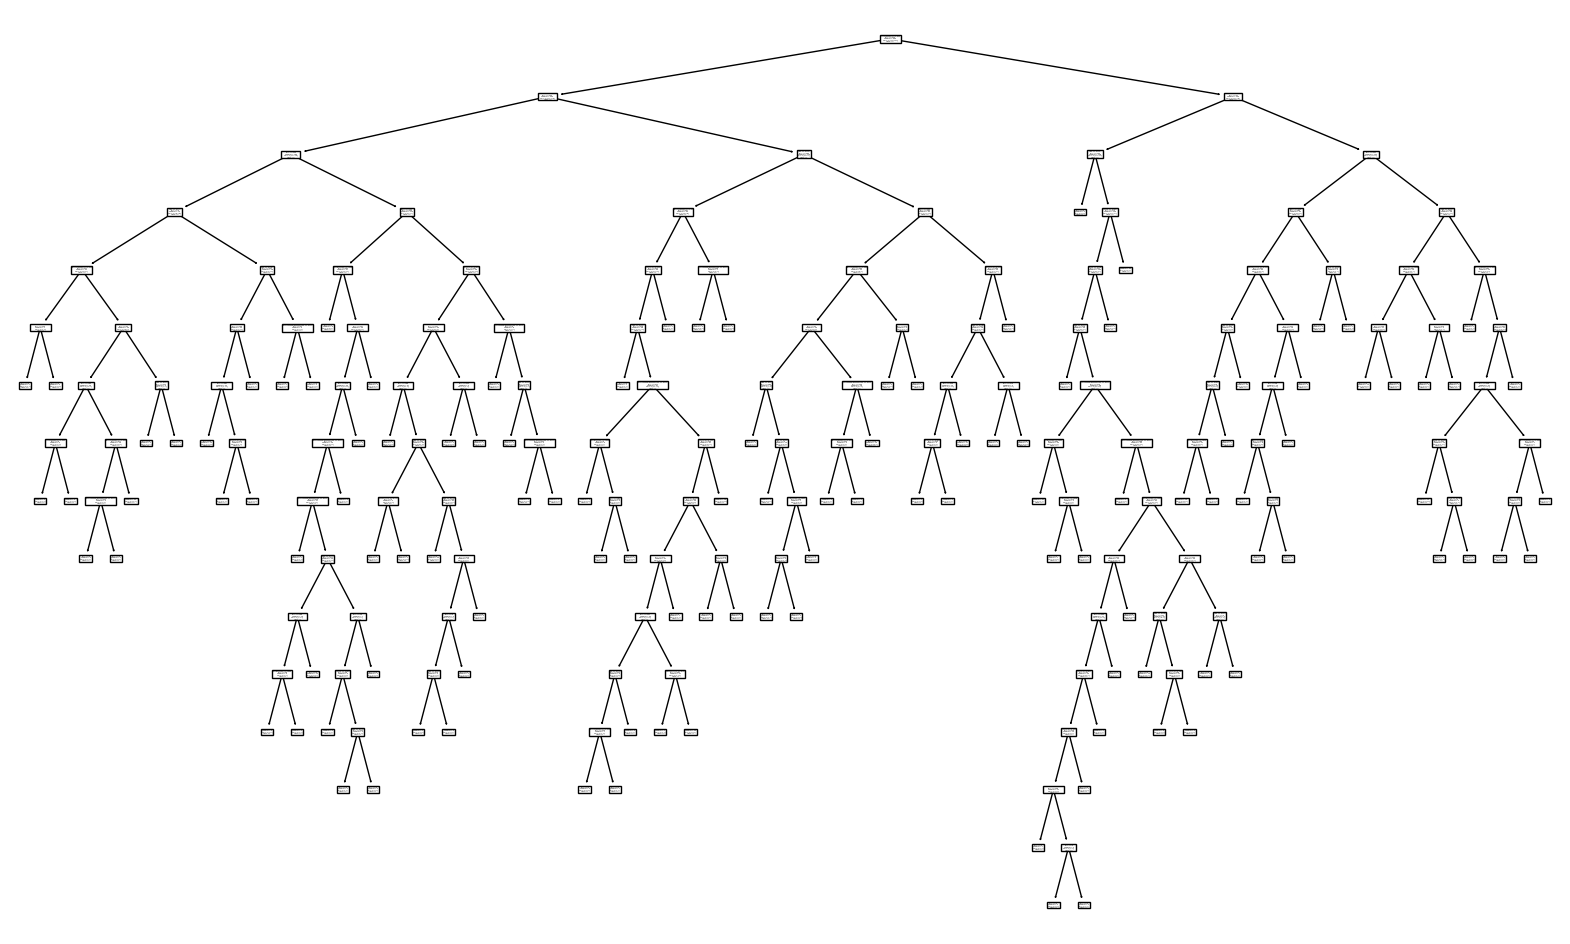

In [35]:
# Decision Tree
#convert our X_train back in a DF
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

#call model
dt = DecisionTreeClassifier()

#fit the model
dt.fit(X_train_scaled_df, y_train)

#predict model


#Plot the tree
#format results in DOT
dot = tree.export_graphviz(dt, out_file=None, feature_names=X_train_scaled_df.columns)

#Save the DOT file
with open("decision_tree.dot", "w") as file:
    file.write(dot)

#Plot the result
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names=X_train_scaled_df.columns, class_names=['0', '1'])
plt.show()

## Model 4

### Random Forest

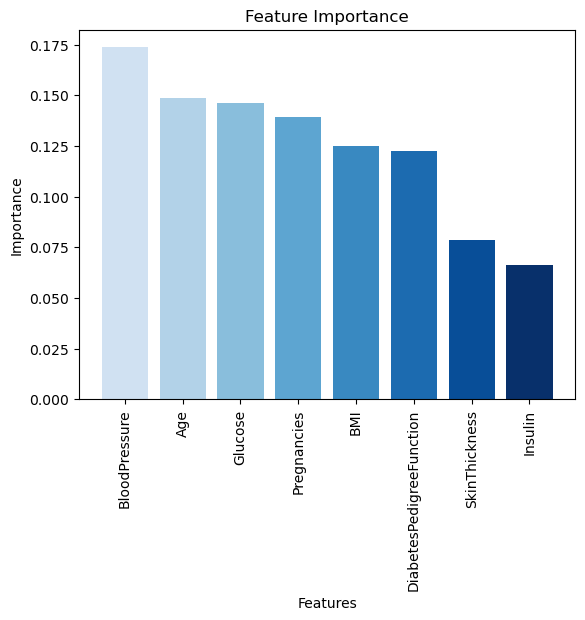

In [47]:
# Random Forest
#call model
rf = RandomForestClassifier()

#fit the model
rf.fit(X_train_scaled, y_train)

#Plot the random forest Feat importance
#get feat importances
feat_import = rf.feature_importances_

#Plot feature importances
#sort color
num_features = len(X_train_scaled_df.columns)
colors = plt.cm.Blues(np.linspace(0.2, 1, num_features))

#sort order
sorted_indices = np.argsort(feat_import)[::-1]
sorted_labels = X_train_scaled_df.columns[sorted_indices]
sorted_importances = feat_import[sorted_indices]

plt.bar(sorted_labels, sorted_importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)

plt.show()

## Model 5

### Support Vector Machine

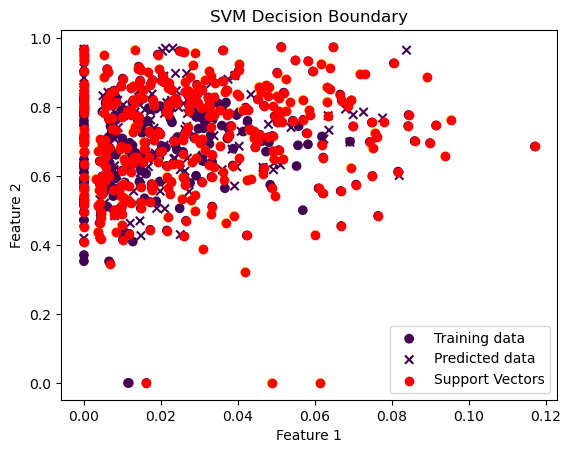

In [57]:
# Support Vector Machine
# Call model
svm = SVC(kernel='linear', C=1.0, gamma='scale')

# Fit the model
svm.fit(X_train_scaled, y_train)

#predict
y_pred = svm.predict(X_test_scaled)

# Plot the SVM decision boundary and support vectors
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', label='Training data')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicted data')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], color='red', marker='o', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

# Conclusion

In [66]:
# Comparing the results
#create predictions & accuracy scores
model1 = lr.predict(X_test_scaled)
model2 = knn.predict(X_test_scaled)
model3 = dt.predict(X_test_scaled)
model4 = rf.predict(X_test_scaled)
model5 = svm.predict(X_test_scaled)

model1_labels = [1 if prediction >= 0.5 else 0 for prediction in model1]
model2_labels = [1 if prediction >= 0.5 else 0 for prediction in model2]
model3_labels = [1 if prediction >= 0.5 else 0 for prediction in model3]
model4_labels = [1 if prediction >= 0.5 else 0 for prediction in model4]
model5_labels = [1 if prediction >= 0.5 else 0 for prediction in model5]


# Calculate accuracy score
accuracy1 = accuracy_score(y_test, model1_labels)
accuracy2 = accuracy_score(y_test, model2_labels)
accuracy3 = accuracy_score(y_test, model3_labels)
accuracy4 = accuracy_score(y_test, model4_labels)
accuracy5 = accuracy_score(y_test, model5_labels)

print(f'Accuracy of Linear Regression: {accuracy1}')
print(f'Accuracy of K-Nearest Neighbor: {accuracy2}')
print(f'Accuracy of Decision Tree: {accuracy3}')
print(f'Accuracy of Random Forest: {accuracy4}')
print(f'Accuracy of Support Vector Machine: {accuracy5}')

Accuracy of Linear Regression: 0.7410071942446043
Accuracy of K-Nearest Neighbor: 0.6618705035971223
Accuracy of Decision Tree: 0.6330935251798561
Accuracy of Random Forest: 0.7194244604316546
Accuracy of Support Vector Machine: 0.7194244604316546


c:\Users\kimka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kimka\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


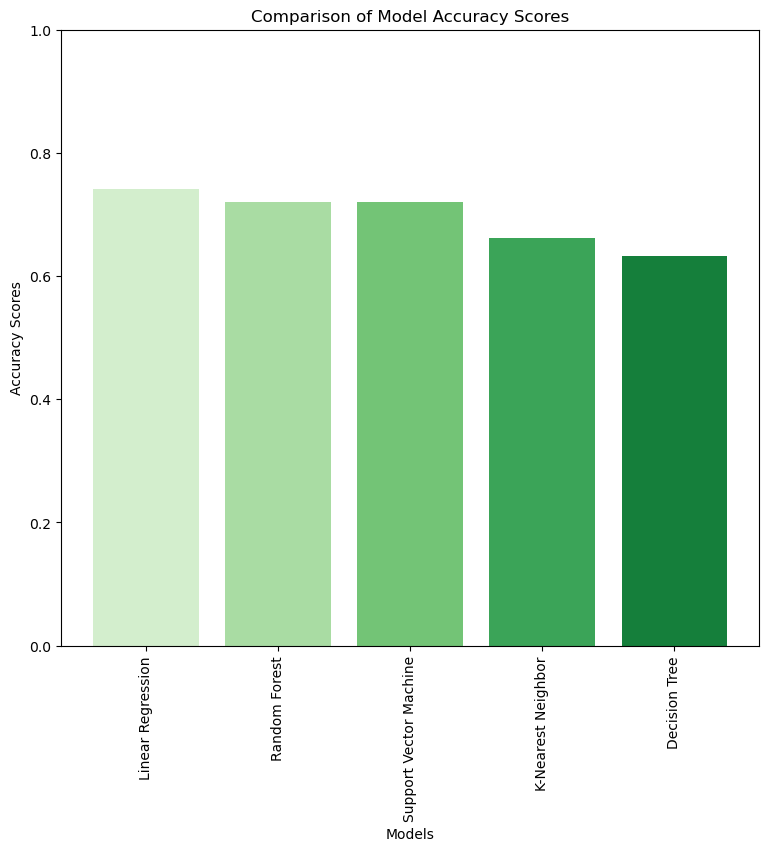

In [78]:
# Plot the accuracy scores
accuracy_scores = {
    'Linear Regression': accuracy1,
    'Random Forest': accuracy4,
    'Support Vector Machine': accuracy5,
    'K-Nearest Neighbor': accuracy2,
    'Decision Tree': accuracy3
}

models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

colormap = plt.cm.get_cmap('Greens')
colors = colormap(np.linspace(0.2, 0.8, len(scores)))

plt.figure(figsize=(9, 8))
plt.bar(models, scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.show()

Based on the results of our machine learning models, we can draw the following conclusions:

1. Linear Regression achieved an accuracy of 0.741, indicating that it performed relatively well in predicting the target variable compared to the other models. It shows the highest accuracy among all the models evaluated.

2. K-Nearest Neighbor (KNN) achieved an accuracy of 0.662, which is lower than Linear Regression. This suggests that KNN may not be as effective in capturing the underlying patterns in the data.

3. The Decision Tree model achieved an accuracy of 0.633, which is the lowest among all the models evaluated. This indicates that the Decision Tree may not have captured the complexity of the data as effectively as the other models.

4. Random Forest achieved an accuracy of 0.719, which is relatively good but slightly lower than Linear Regression. Random Forest combines multiple decision trees to make predictions and usually performs well in a variety of scenarios.

5. Support Vector Machine (SVM) achieved an accuracy of 0.719, which is the same as the Random Forest model. SVMs are powerful models for classification tasks, but in this case, it seems to have performed similarly to the Random Forest model.

**In conclusion, based on the accuracy scores, Linear Regression appears to be the best-performing model among the ones evaluated. However, it's essential to consider other evaluation metrics and perform further analysis to make a comprehensive assessment of the models' performance.**